# Code for figures in problem a)

In this notebook we do experiments with minimising OLS and Ridge cost functions for the Franke function for different methods and hyperparametres

In [11]:
# IMPORT
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from Code.descent_methods import *
from Code.utilities import MSE_grad, train_test_split, plot_test_results, MSE_grad, MSELoss

# Import tools from the first project 
from Code.project1_tools import feature_matrix_2d, r2_sampling

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Initialise beta
num_features = 15
beta0 = {"b" : np.random.random(num_features)}

# Sample points and split in train and test
num_points = 10000
data = r2_sampling(num_points, sigma2=0.3)
x, y, z = data["x"], data["y"], data["z"]
X = feature_matrix_2d(x, y, num_features)
X_train, y_train, X_test, y_test, test_index = train_test_split(X, z, 0.2)

# Quickfix...
y_train, y_test = np.squeeze(y_train), np.squeeze(y_test)

# Define the polynomial fit model
def model(beta, X):
    return np.dot(X, beta["b"])

### Analytic gradients
from Code.utilities import OLS_grad, ridge_grad

# Our framework requires standardised gradient taking parametres beta, X, y
def OLS_train_grad(model):
    return lambda beta, X, y: {"b" : OLS_grad(beta, X, y, model)}

def ridge_train_grad(model, lam):
    return lambda beta, X, y : {"b" : ridge_grad(beta, X, y, model, lam)}


### Jax gradients, need loss functions
from Code.utilities import Ridge_loss_method, MSELoss_method

def ridge_loss_func(lam):
    return lambda beta, X, y : MSELoss(model(beta, X), y) + jnp.sum(jnp.power(beta["b"], 2)) * lam / (2 * jnp.size(y))

def OLS_loss_func():
    return lambda beta, X, y : MSELoss(model(beta, X), y)
    

# With these, all we need to find gradient is
from jax import grad as jaxgrad

In [13]:
# Initialise beta
n_epochs = 100


lam=0.1
lr = 0.05

OLS_loss = OLS_loss_func()

#OLS_train_grad(model), ridge_train_grad(model, lam), 

for grad in [jaxgrad(OLS_loss)]:#, jaxgrad(ridge_loss_func(lam))]:
    result_GD = GD(X_train, y_train, X_test, y_test, 
                grad_method=grad, 
                n_epochs=epochs, 
                lr=lr,
                beta0=beta0, 
                test_loss_func=(MSELoss_method(model)))

    plt.plot(result_GD["train_loss_list"])
    plt.plot(result_GD["test_loss_list"], linestyle="--")

plt.legend()
plt.show()

TracerArrayConversionError: The numpy.ndarray conversion method __array__() was called on traced array with shape float32[15].
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerArrayConversionError

In [ ]:
"""
### analysis of results for OLS and RIDGE as function of
- lr
- #mini batches
- #epochs
- algorithm

- lambda for ridge!
    - use seabord ... to show results as function of lr and lam !
"""


'\n### analysis of results for OLS and RIDGE as function of\n- lr\n- #mini batches\n- #epochs\n- algorithm\n\n- lambda for ridge!\n    - use seabord ... to show results as function of lr and lam !\n'

### Seaborn Ridge
Ridge as function of learning rate and lambda

use seabord ... to show results as function of lr and lam !


c:\Users\Trond\OneDrive\7. semester\FYS-STK3155 - Anvendt dataanalyse og maskinlæring\Projects\Project2_FYS_STK4155\.venv\lib\site-packages\jax\_src\dispatch.py:172: RuntimeWarning: overflow encountered in cast
  return lambda *args, **kw: call(*args, **kw)[0]
c:\Users\Trond\OneDrive\7. semester\FYS-STK3155 - Anvendt dataanalyse og maskinlæring\Projects\Project2_FYS_STK4155\.venv\lib\site-packages\jax\_src\numpy\array_methods.py:256: RuntimeWarning: overflow encountered in cast
  return binary_op(*args)


[[11.85864639 11.85864639 11.85864639 11.85864639 11.85854053 11.85790443
  11.85254669 11.81258583 11.50548363  9.39391613]
 [11.82790279 11.82790279 11.82790279 11.82778263 11.82703304 11.82191753
  11.78172493 11.47559547  9.36995125  2.16654134]
 [11.59196281 11.59195423 11.59187889 11.59121132 11.58612251 11.54683971
  11.24733543  9.18690205  2.13368487  0.28982759]
 [ 9.94733143  9.9472599   9.94670486  9.94240093  9.90913963  9.65556622
   7.90995264  1.90354192  0.29056653  0.28934753]
 [ 3.71826243  3.71808243  3.71669149  3.70594168  3.62389708  3.0553441
   0.9994154   0.29667634  0.29010597  0.28934753]
 [ 0.75341249  0.7532922   0.75236124  0.74524039  0.69502467  0.48716468
   0.33628663  0.29634553  0.29010597         nan]
 [ 0.41519618  0.41509944  0.41435829  0.40904278  0.38487944  0.37284008
   0.3361609   0.29634553         nan         nan]
 [ 0.47352424  0.47250289  0.46504793  0.4267506   0.3768093   0.37281975
   0.33616096         nan         nan         nan]
 

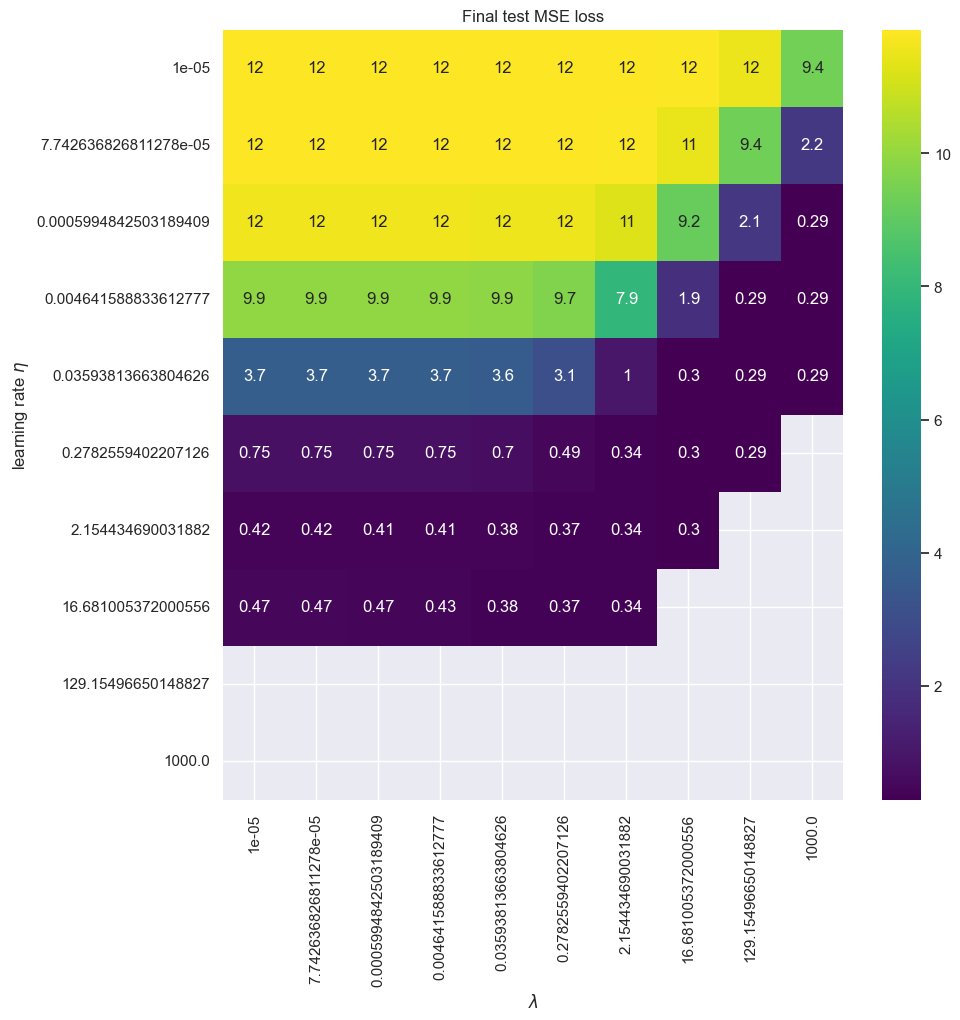

In [ ]:
# ensure the same random numbers appear every time
np.random.seed(0)

# Fixed parametres
epochs = 500

# Values for experiment
lr_vals = np.logspace(-5, 3, 10)
lam_vals = np.logspace(-5, 3, 10)
results = np.zeros((len(lr_vals), len(lam_vals)))

# Perform algorithm for each value
for i, lr in enumerate(lr_vals):
    for j, lam in enumerate(lam_vals):

        # Get gradient function for given lambda
        grad = ridge_train_grad(model, lam)

        # Perform experiment
        result_GD = GD(X_train, y_train, X_test, y_test, 
                    grad_method=grad, 
                    n_epochs=epochs, 
                    lr=lr,
                    beta0=beta0, 
                    test_loss_func=(MSELoss_method(model)))

        # Append the final error from training
        results[i, j] = result_GD["test_loss_list"][-1]

print(results)

sns.set()
fig, ax = plt.subplots(figsize = (10, 10))
df = pd.DataFrame(results, index=lam_vals, columns=lr_vals)
sns.heatmap(df, annot=True, ax=ax, cmap="viridis")
ax.set_title("Final test MSE loss")
ax.set_ylabel("learning rate $\eta$")
ax.set_xlabel("$\lambda$")
plt.show()